<a href="https://colab.research.google.com/github/nam-hoang-le/Binary-Classifier-with-SVM/blob/le-hoang-nam/Binary_Classifier_with_SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Xây dựng phân loại nhị phân với Support Vector Machine sử dụng thư viện scikit-learn

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
dataset_path = '/content/drive/MyDrive/linear_separable_bin_clf.csv'
df = pd.read_csv(
    dataset_path,
    names = ['label', 'features_1', 'features_2']
)
df

,label,features_1,features_2
0,1.0,2.6487,4.5192
1,1.0,1.5438,2.4443
2,1.0,1.8990,4.2409
3,1.0,2.4711,5.8097
4,1.0,3.3590,6.4423
...,...,...,...
95,-1.0,7.3641,5.9868
96,-1.0,6.2592,4.6711
97,-1.0,8.3703,7.5810
98,-1.0,8.5676,4.6457


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       100 non-null    float64
 1   features_1  100 non-null    float64
 2   features_2  100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [ ]:
df.describe()

,label,features_1,features_2
count,100.000000,100.000000,100.000000
mean,0.000000,4.866669,5.144230
std,1.005038,1.964860,2.103965
min,-1.000000,1.169000,0.900800
25%,-1.000000,3.418175,3.469150
50%,0.000000,4.927500,5.265700
75%,1.000000,6.466375,6.720625
max,1.000000,8.567600,8.922100


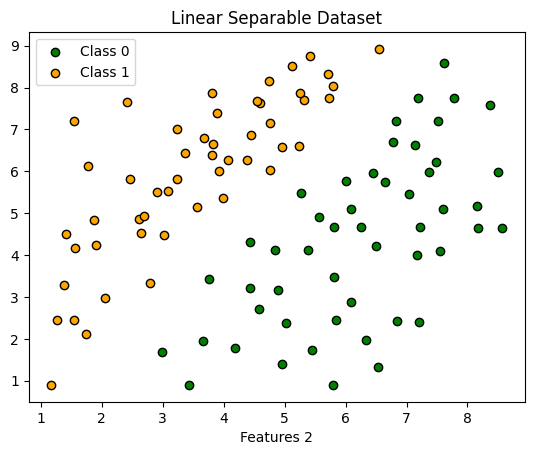

In [ ]:
class_0 = df[df['label'] == -1]
class_1 = df[df['label'] == 1]
plt.scatter(
    class_0['features_1'],
    class_0['features_2'],
    edgecolor = "black",
    marker = 'o',
    color = 'green',
    label = 'Class 0'
)
plt.scatter(
    class_1['features_1'],
    class_1['features_2'],
    edgecolor = "black",
    marker = 'o',
    color = 'orange',
    label = 'Class 1'
)

plt.xlabel('Features 1')
plt.xlabel('Features 2')
plt.title('Linear Separable Dataset')
plt.legend()
plt.show()

In [ ]:
dataset_arr = df.to_numpy()
X, y = dataset_arr[:, 1:], dataset_arr[:, 0]

test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X,y,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

print(X_train.shape[0])
print(X_val.shape[0])

70
30


In [ ]:
classifier = SVC(
    kernel = 'linear',
    random_state = random_state
)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [ ]:
y_pred = classifier.predict(X_val)
scores = accuracy_score(y_pred, y_val)
print('Evaluation results on validation set: ')
print(scores)

Evaluation results on validation set: 
0.8666666666666667


In [ ]:
# non-linear

In [ ]:
dataset_path = '/content/drive/MyDrive/nonlinear_bin_clf.csv'
df = pd.read_csv(
    dataset_path,
    names = ['label', 'features_1', 'features_2']
)
df

,label,features_1,features_2
0,1.0,2.2541,2.0142
1,1.0,3.0630,3.5071
2,1.0,2.7079,2.3684
3,1.0,3.3393,3.2794
4,1.0,3.5760,4.2409
...,...,...,...
95,-1.0,3.0630,7.2267
96,-1.0,2.4711,5.3543
97,-1.0,2.1357,4.3674
98,-1.0,1.7806,5.7338


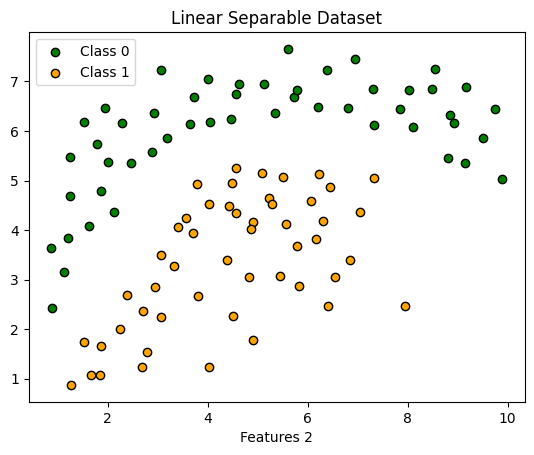

In [ ]:
class_0 = df[df['label'] == -1]
class_1 = df[df['label'] == 1]
plt.scatter(
    class_0['features_1'],
    class_0['features_2'],
    edgecolor = "black",
    marker = 'o',
    color = 'green',
    label = 'Class 0'
)
plt.scatter(
    class_1['features_1'],
    class_1['features_2'],
    edgecolor = "black",
    marker = 'o',
    color = 'orange',
    label = 'Class 1'
)

plt.xlabel('Features 1')
plt.xlabel('Features 2')
plt.title('Linear Separable Dataset')
plt.legend()
plt.show()

In [ ]:
dataset_arr_2 = df.to_numpy()
X, y = dataset_arr_2[:, 1:], dataset_arr[:, 0]

test_size = 0.3
random_state = 1
is_shuffle = True
X_train, X_val, y_train, y_val = train_test_split(
    X,y,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle
)

print(X_train.shape[0])
print(X_val.shape[0])

70
30


In [ ]:
classifier = SVC(
    kernel = 'linear',
    random_state = random_state
)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

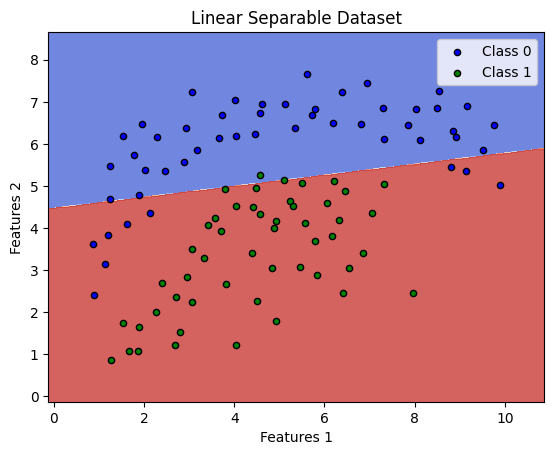

In [ ]:
class_0 = df[df['label'] == -1]
class_1 = df[df['label'] == 1]
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(class_0['features_1'], class_0['features_2'], s=20, edgecolor="black", marker='o', color='blue', label='Class 0')
plt.scatter(class_1['features_1'], class_1['features_2'], s=20, edgecolor="black", marker='o', color='green', label='Class 1')
plt.xlabel('Features 1')
plt.ylabel('Features 2')
plt.title('Linear Separable Dataset')
plt.legend()
plt.show()

In [ ]:
y_pred = classifier.predict(X_val)
scores = accuracy_score(y_pred, y_val)
print('Evaluation results on validation set: ')
print(scores)

Evaluation results on validation set: 
0.8666666666666667


In [ ]:
classifier = SVC(
    kernel = 'rbf',
    random_state = random_state
)
classifier.fit(X_train, y_train)

SVC(random_state=1)

In [ ]:
y_pred = classifier.predict(X_val)
scores = accuracy_score(y_pred, y_val)
print('Evaluation results on validation set: ')
print(scores)

Evaluation results on validation set: 
1.0


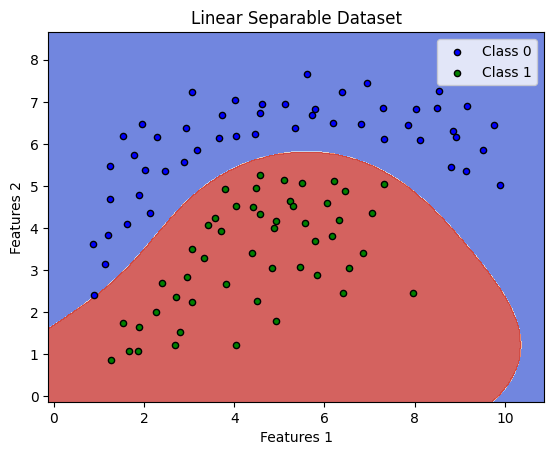

In [ ]:
class_0 = df[df['label'] == -1]
class_1 = df[df['label'] == 1]
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(class_0['features_1'], class_0['features_2'], s=20, edgecolor="black", marker='o', color='blue', label='Class 0')
plt.scatter(class_1['features_1'], class_1['features_2'], s=20, edgecolor="black", marker='o', color='green', label='Class 1')
plt.xlabel('Features 1')
plt.ylabel('Features 2')
plt.title('Linear Separable Dataset')
plt.legend()
plt.show()